# Data Extraction and Inspection

In [2]:
import numpy as np
import pandas as pd
import os
import requests
import zipfile
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Extract all zipped files
dest_dir = 'C:\\Users\\bencxs\\workspace\\melbourne-housing-market'
source_filename = 'melbourne-housing-market.zip'

def unzip(source_filename, dest_dir):
    print("Extracting " + source_filename)
    with zipfile.ZipFile(source_filename) as zf:
        zf.extractall(dest_dir)
    print("Extracted " + source_filename)
        
unzip(source_filename, dest_dir)

Extracting melbourne-housing-market.zip
Extracted melbourne-housing-market.zip


In [4]:
# Read in extracted csv file
'''headers = ['col1', 'col2', 'col3', 'col4']
dtypes = {'col1': 'str', 'col2': 'str', 'col3': 'str', 'col4': 'float'}
parse_dates = ['col1', 'col2']
pd.read_csv(file, sep='\t', header=None, names=headers, dtype=dtypes, parse_dates=parse_dates)'''

df = pd.read_csv('Melbourne_housing.csv')

display(df.head())
print(df.dtypes)
display(df.describe())

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03-09-2016,2.5
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03-12-2016,2.5
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04-02-2016,2.5
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04-02-2016,2.5
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04-03-2017,2.5


Suburb       object
Address      object
Rooms         int64
Type         object
Price       float64
Method       object
SellerG      object
Date         object
Distance    float64
dtype: object


C:\Users\bencxs\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Rooms,Price,Distance
count,11511.000000,8.996000e+03,11511.000000
mean,2.901051,1.069571e+06,8.643576
std,0.986455,6.587353e+05,3.550445
min,1.000000,8.500000e+04,1.200000
25%,2.000000,NaN,5.900000
50%,3.000000,NaN,8.800000
75%,3.000000,NaN,11.200000
max,12.000000,6.500000e+06,15.000000


In [5]:
pd.unique(df['Suburb'].values.ravel())

array(['Abbotsford', 'Airport West', 'Albert Park', 'Alphington', 'Altona',
       'Altona North', 'Armadale', 'Ascot Vale', 'Ashburton', 'Ashwood',
       'Avondale Heights', 'Balaclava', 'Balwyn', 'Balwyn North',
       'Bentleigh', 'Bentleigh East', 'Box Hill', 'Braybrook', 'Brighton',
       'Brighton East', 'Brunswick', 'Brunswick West', 'Bulleen',
       'Burwood', 'Camberwell', 'Canterbury', 'Carlton North', 'Carnegie',
       'Caulfield', 'Caulfield North', 'Caulfield South', 'Chadstone',
       'Clifton Hill', 'Coburg', 'Coburg North', 'Collingwood',
       'Doncaster', 'Eaglemont', 'Elsternwick', 'Elwood', 'Essendon',
       'Essendon North', 'Fairfield', 'Fitzroy', 'Fitzroy North',
       'Flemington', 'Footscray', 'Glen Iris', 'Glenroy', 'Gowanbrae',
       'Hadfield', 'Hampton', 'Hampton East', 'Hawthorn',
       'Heidelberg Heights', 'Heidelberg West', 'Hughesdale', 'Ivanhoe',
       'Kealba', 'Keilor East', 'Kensington', 'Kew', 'Kew East', 'Kooyong',
       'Maidstone', 

In [6]:
pd.unique(df['Rooms'].values.ravel())

array([ 2,  3,  4,  1,  5,  6,  7,  8, 10,  9, 12], dtype=int64)

In [7]:
pd.unique(df['Type'].values.ravel())

array(['h', 'u', 't'], dtype=object)

In [8]:
pd.unique(df['Method'].values.ravel())

array(['SS', 'S', 'VB', 'SP', 'PI', 'SN', 'W', 'PN', 'SA'], dtype=object)

In [9]:
pd.unique(df['SellerG'].values.ravel())

array(['Jellis', 'Biggin', 'Rounds', 'Nelson', 'Collins', 'Dingle',
       'Purplebricks', 'Greg', 'Philip', 'LITTLE', 'Marshall',
       'hockingstuart', 'Brad', 'Maddison', 'Barry', 'Airport',
       'Considine', 'Rendina', 'Ray', 'Propertyau', 'McDonald', 'Frank',
       'Prof.', 'Harcourts', 'Thomson', 'Buxton', 'RT', "Sotheby's",
       'Cayzer', 'Chisholm', 'McGrath', 'Brace', 'Miles', 'Holland',
       'Love', 'Thomas', 'Barlow', 'Sweeney', 'Village', 'Jas', 'Gunn&Co',
       'Williams', 'Burnham', 'Point', 'Compton', 'FN', 'Hunter',
       'Raine&Horne', 'Noel', 'Hodges', 'Gary', 'Kay', 'Fletchers',
       'Woodards', 'Raine', 'Alexkarbon', 'Walshe', 'Weda', 'Stockdale',
       'Tim', 'Buxton/Marshall', 'Moonee', 'HAR', 'Edward', 'Beller', 'RW',
       'North', 'MICM', 'Ascend', 'Christopher', 'Morrison', 'Bekdon',
       'Mandy', 'R&H', 'Fletchers/One', 'Lindellas', 'Appleby', 'Assisi',
       'One', 'Owen', 'Parkes', 'C21', 'Century', "O'Brien", 'Bayside',
       'Anderson', 

In [10]:
df['Suburb'].value_counts()

Reservoir             378
Bentleigh East        258
Richmond              256
Glen Iris             226
Kew                   208
Preston               207
Brighton              204
South Yarra           197
St Kilda              192
Balwyn North          190
Brighton East         189
Coburg                185
Camberwell            183
Brunswick             180
Malvern East          179
Hawthorn              176
Northcote             175
Essendon              174
Glenroy               167
Port Melbourne        163
Balwyn                158
Pascoe Vale           149
Prahran               143
Bentleigh             139
Yarraville            137
Toorak                136
Elwood                133
Carnegie              130
Hawthorn East         129
Thornbury             127
                     ... 
Yallambie              27
West Melbourne         26
Ivanhoe East           25
East Melbourne         25
Albion                 25
Spotswood              24
Cremorne               24
Gowanbrae   

In [11]:
df['Address'].value_counts()

5 Charles St           5
7 Hope St              3
5 Margaret St          3
38 Lily St             3
28 Blair St            3
14 Rose St             3
3 Burnett Cr           2
22 William St          2
403/8 Howard St        2
13 Garnet St           2
2 May St               2
6 Brooke St            2
3 Wilson Mw            2
1/16 Mawbey St         2
7 Colclough Ct         2
194 Napier St          2
7 Wallace St           2
3/220 Warrigal Rd      2
15 Lancaster St        2
2/13 Cartwright St     2
12 Witchwood Cl        2
92 Madden Gr           2
1/2 Pershing St        2
4 Thames St            2
1703/8 Franklin St     2
25 Gray St             2
106/80 Speakmen St     2
2 Celia St             2
5/8 Swan St            2
7 Francis St           2
                      ..
6/99 Kent Rd           1
25 Connie St           1
10 Intervale Dr        1
83a Brunel St          1
6/99 Neerim Rd         1
4 Kelvin Gr            1
439 Plenty Rd          1
129/4 Bik La           1
206 Stockmans Wy       1


In [12]:
df['Rooms'].value_counts()

3     4674
2     3385
4     2222
1      639
5      518
6       51
7        9
8        7
10       3
9        2
12       1
Name: Rooms, dtype: int64

In [13]:
df['Type'].value_counts()

h    7372
u    2891
t    1248
Name: Type, dtype: int64

In [14]:
df['Method'].value_counts()

S     6772
SP    1629
PI    1543
VB     906
SN     470
PN     102
W       41
SA      38
SS      10
Name: Method, dtype: int64

In [15]:
df['SellerG'].value_counts()

Nelson                   1351
Jellis                   1283
hockingstuart            1046
Marshall                  855
Barry                     812
Buxton                    606
Ray                       437
Biggin                    366
Brad                      297
Fletchers                 255
RT                        248
Woodards                  246
Miles                     217
Greg                      200
Sweeney                   188
Jas                       179
Gary                      175
Kay                       167
Noel                      133
McGrath                   131
Hodges                    115
Stockdale                 114
Village                   109
Williams                   98
Chisholm                   78
Love                       77
Raine                      71
Douglas                    70
Rendina                    63
Harcourts                  53
                         ... 
Metro                       1
hockingstuart/Sweeney       1
Win       

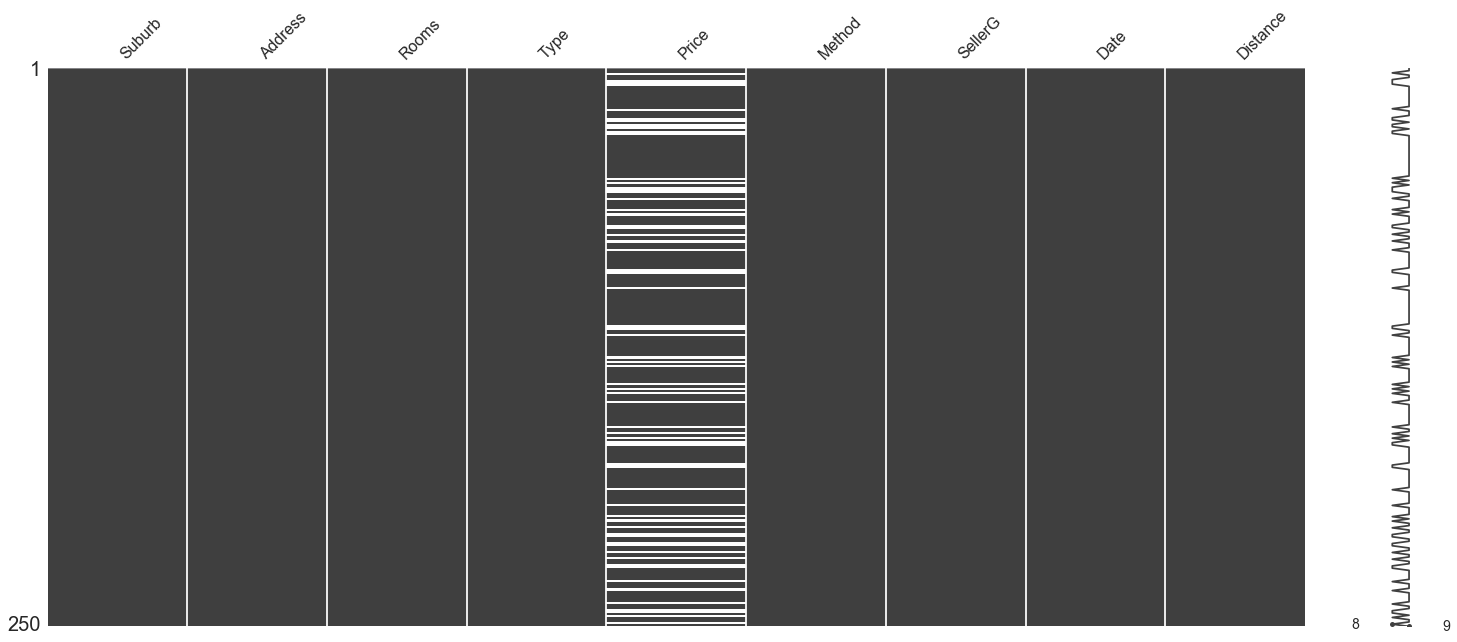

In [16]:
import missingno as msno

msno.matrix(df.sample(250))

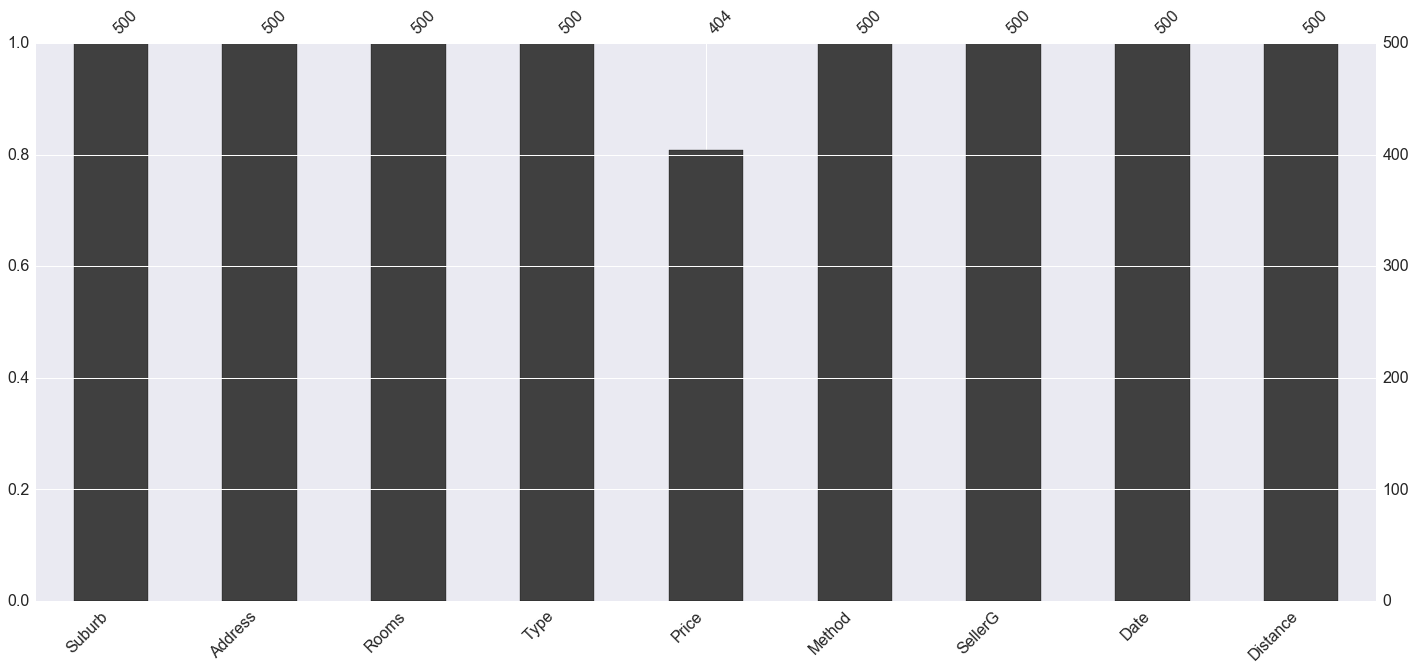

In [17]:
msno.bar(df.sample(500))

# Data Cleaning

We will need to fix a few things:
1. Convert Address and Date to the correct data type
2. Understand the NaN issue for Price

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

print(df.dtypes)

Suburb              object
Address             object
Rooms                int64
Type                object
Price              float64
Method              object
SellerG             object
Date        datetime64[ns]
Distance           float64
dtype: object


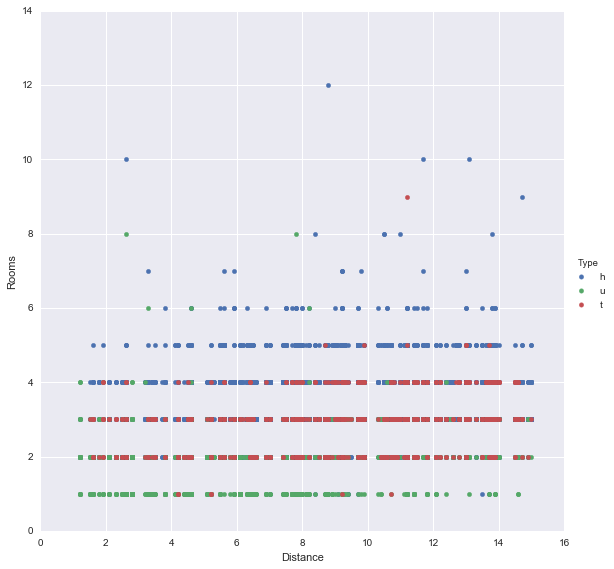

In [19]:
sns.set(style="whitegrid")

sns.FacetGrid(df, hue="Type", size=8) \
   .map(plt.scatter, "Distance", "Rooms") \
   .add_legend()

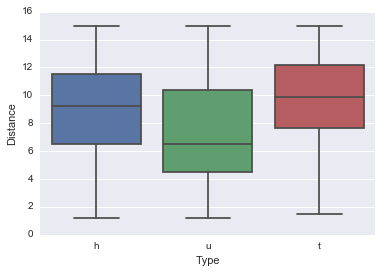

In [20]:
sns.boxplot(x="Type", y="Distance", data=df)

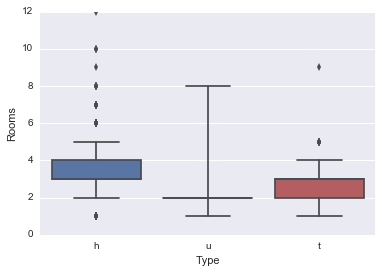

In [21]:
sns.boxplot(x="Type", y="Rooms", data=df)

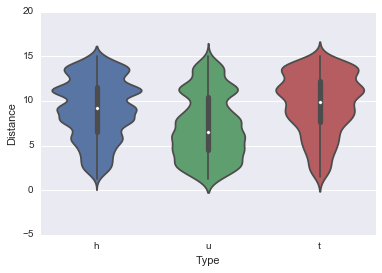

In [22]:
sns.violinplot(x="Type", y="Distance", data=df, size=6)

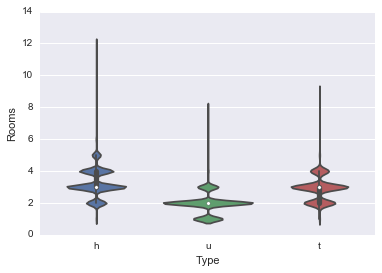

In [23]:
sns.violinplot(x="Type", y="Rooms", data=df, size=6)

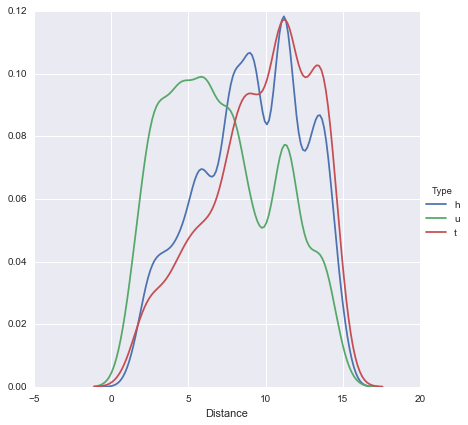

In [24]:
sns.FacetGrid(df, hue="Type", size=6) \
   .map(sns.kdeplot, "Distance") \
   .add_legend()

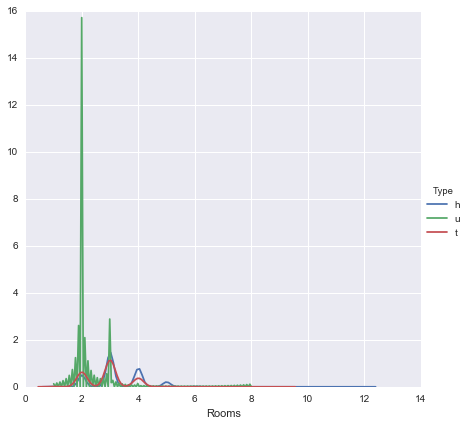

In [25]:
sns.FacetGrid(df, hue="Type", size=6) \
   .map(sns.kdeplot, "Rooms") \
   .add_legend()

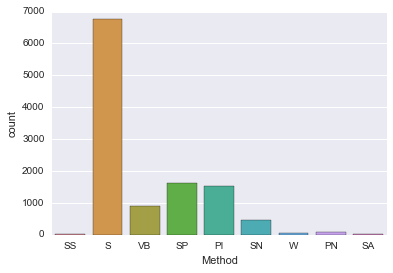

In [26]:
sns.countplot(x="Method", data=df)

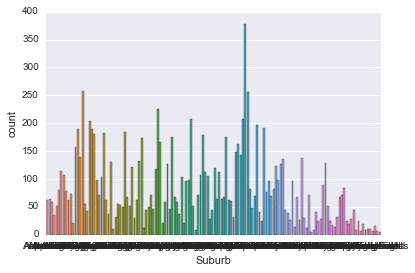

In [27]:
sns.countplot(x="Suburb", data=df)

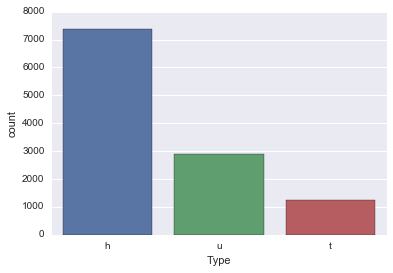

In [28]:
sns.countplot(x="Type", data=df)

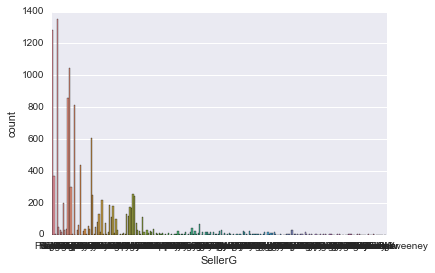

In [29]:
sns.countplot(x="SellerG", data=df)

In [30]:
# Remove rows where Price has NaN values
df1 = df.drop(df[df['Price'].isnull()].index)
df2 = df[df['Price'].isnull()]

display(df1.describe())
display(df2.head())

,Rooms,Price,Distance
count,8996.000000,8.996000e+03,8996.000000
mean,2.853157,1.069571e+06,8.752234
std,0.963423,6.587353e+05,3.597977
min,1.000000,8.500000e+04,1.200000
25%,2.000000,6.300000e+05,5.900000
50%,3.000000,8.900000e+05,9.000000
75%,3.000000,1.330000e+06,11.400000
max,10.000000,6.500000e+06,15.000000


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,2016-06-08,2.5
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,2016-06-08,2.5
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,2016-06-08,2.5


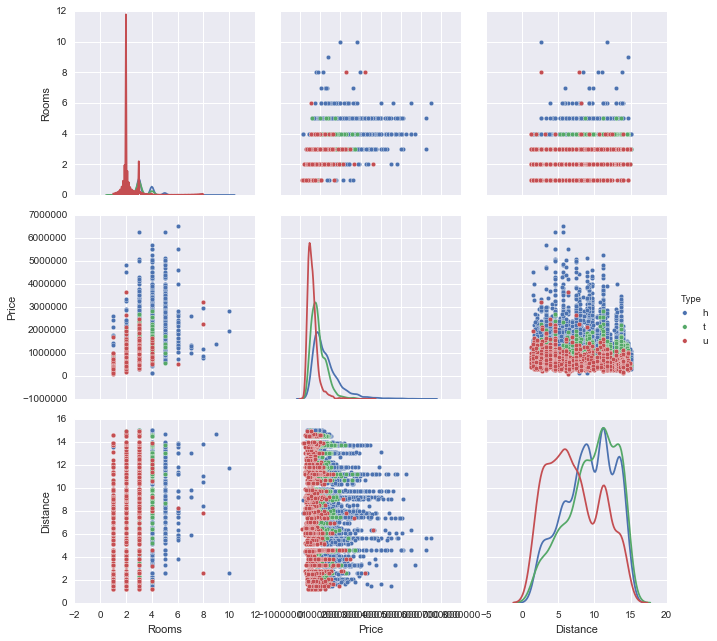

In [31]:
sns.pairplot(df1, hue="Type", size=3, diag_kind="kde")

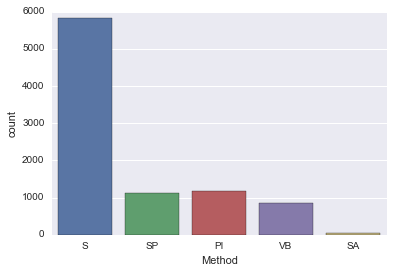

In [32]:
sns.countplot(x="Method", data=df1)

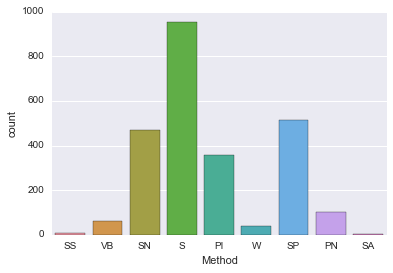

In [33]:
sns.countplot(x="Method", data=df2)

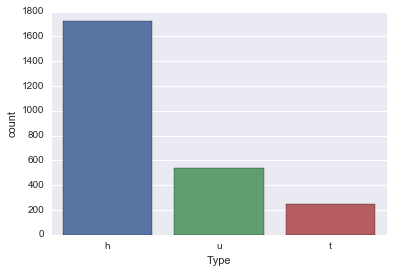

In [34]:
sns.countplot(x="Type", data=df2)

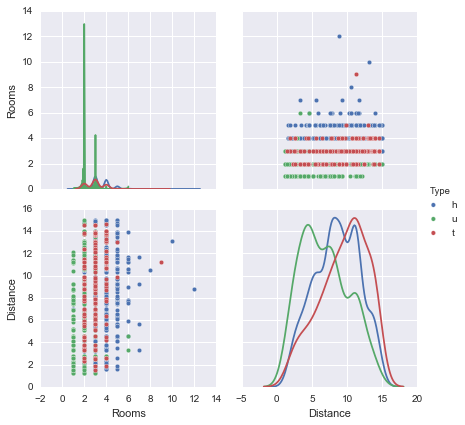

In [35]:
sns.pairplot(df2.drop('Price', axis=1), hue="Type", size=3, diag_kind="kde")

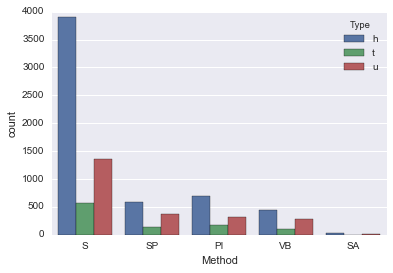

In [36]:
sns.countplot(x="Method", hue="Type", data=df1)

Type                     h             t              u
Suburb                                                 
Abbotsford    1.231710e+06  8.513333e+05  546700.000000
Aberfeldie    1.535111e+06  1.117500e+06  628000.000000
Airport West  7.825882e+05  6.116923e+05  563966.666667
Albert Park   1.946684e+06  1.550000e+06  966500.000000
Albion        6.755833e+05  3.095000e+05  308600.000000


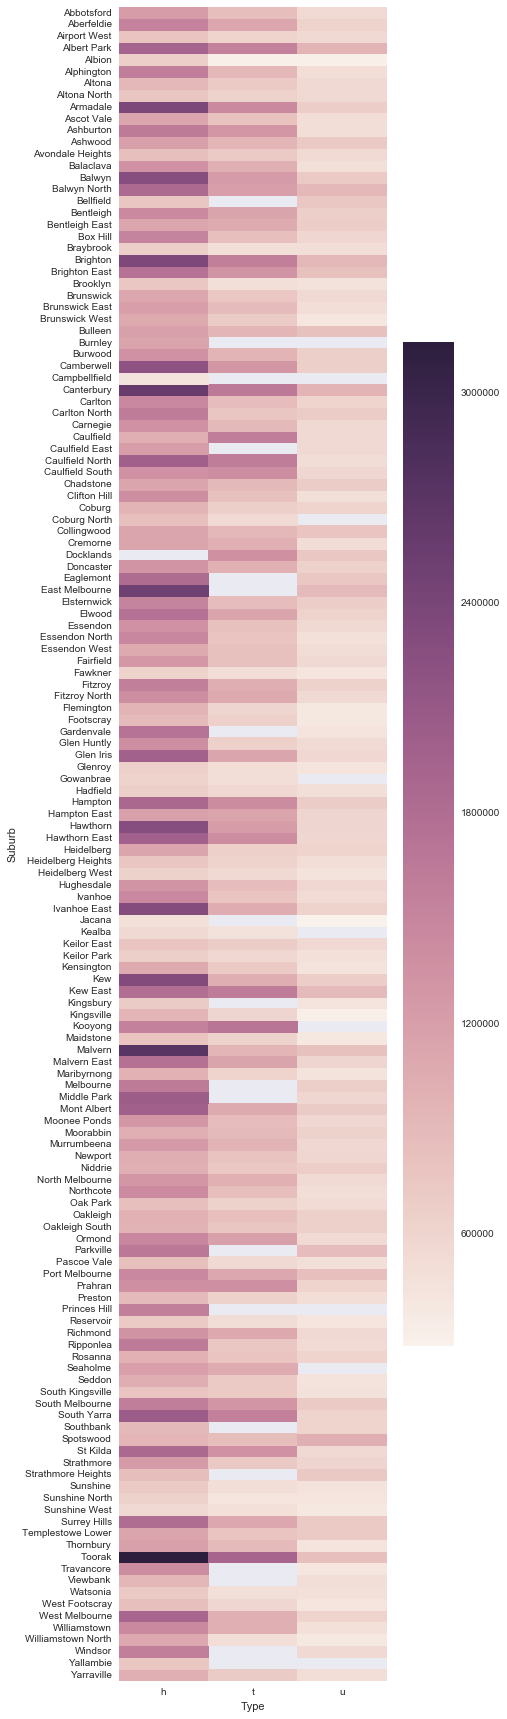

In [37]:
hm = df1[['Suburb','Price','Type']]
hm= hm.groupby(['Suburb', 'Type'], as_index=False)['Price'].mean()
hm = hm.pivot_table(values="Price", index='Suburb', columns='Type')
print(hm.head())

# Draw a heatmap with the mean price per suburb
plt.figure(figsize=(6, 30))
sns.heatmap(hm, annot=False)

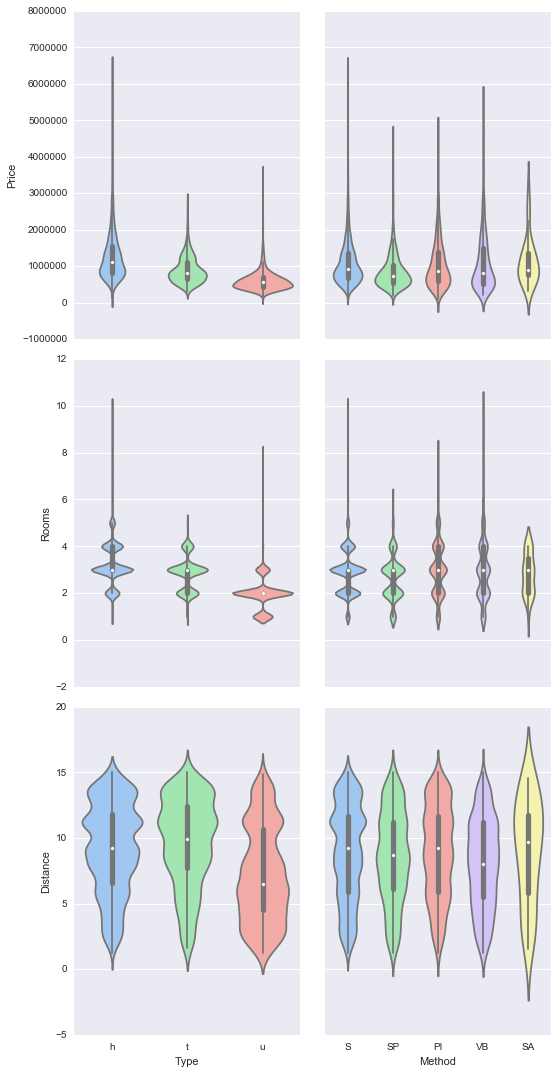

In [38]:
g = sns.PairGrid(df1,
                 x_vars=["Type", "Method"],
                 y_vars=["Price", "Rooms", "Distance"],
                 aspect=.75, size=5)
g.map(sns.violinplot, palette="pastel");

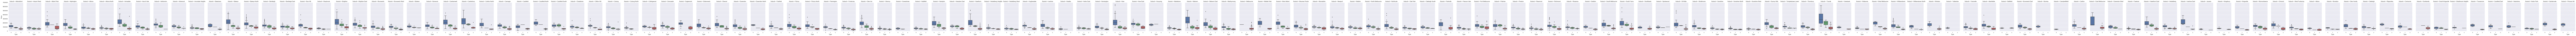

In [39]:
s = sns.factorplot(x="Type", y="Price",
               col="Suburb", data=df1, kind="box", size=4, aspect=.5)
s.savefig('output.png')

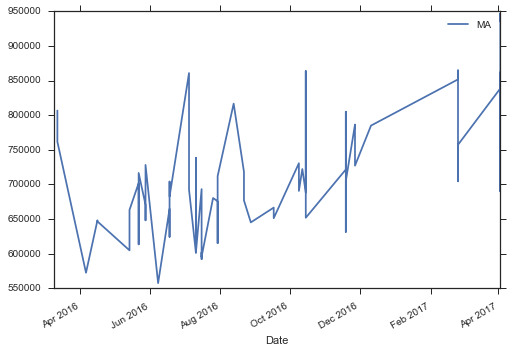

In [94]:
# Plotting the change of prices by suburb and property types over time

te = df1[df1["Suburb"] == "Sunshine"]
te = te[te["Type"] == "h"]
#te = te[te["Rooms"] == 2]
#te.sort_values(by='Date')
te["MA"] = te["Price"].rolling(window=3, center=False).mean()
#display(te[0:60])

te.plot(x="Date", y="MA")

## Price vs Distance, which Suburb reign king?

We explore which suburb brings the best price-value ratio for each property type.

In [50]:
# Distance vs Price, which Suburb reign king?

dp = df1[['Suburb','Price','Distance', 'Type']]
dp1 = dp[dp["Type"] == "h"]
dp1 = dp1.groupby(['Suburb'], as_index=False)['Price', 'Distance'].mean()
print(dp1.head())

         Suburb         Price  Distance
0    Abbotsford  1.231710e+06       2.5
1    Aberfeldie  1.535111e+06       9.1
2  Airport West  7.825882e+05      13.5
3   Albert Park  1.946684e+06       3.3
4        Albion  6.755833e+05      13.9


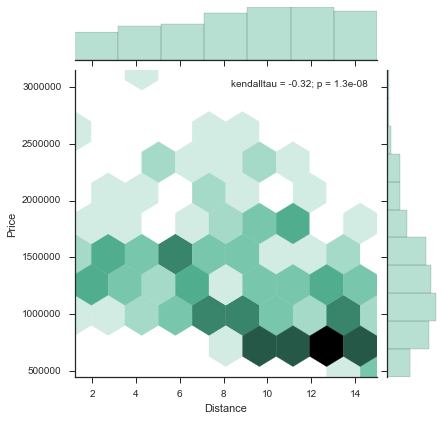

In [51]:
from scipy.stats import kendalltau
sns.set(style="ticks")

sns.jointplot(dp1["Distance"], dp1["Price"], kind="hex", stat_func=kendalltau, color="#4CB391")

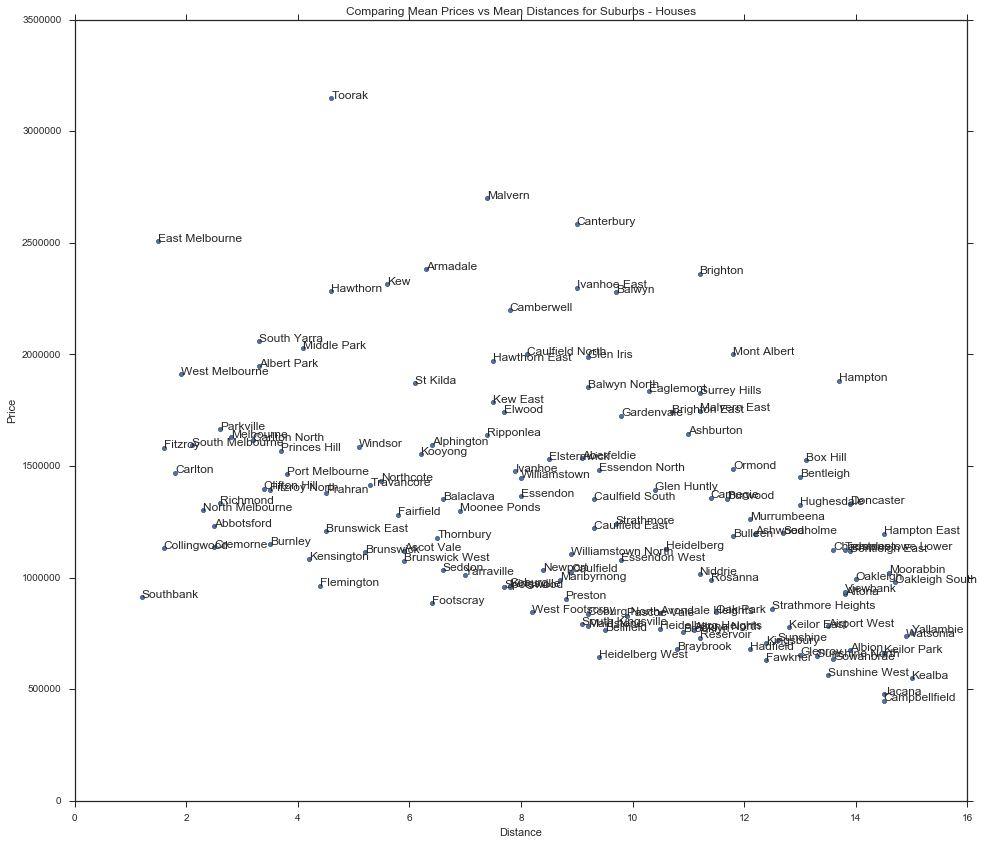

In [73]:
ax = dp1.plot(kind='scatter', 
              title="Comparing Mean Prices vs Mean Distances for Suburbs - Houses", 
              x='Distance', 
              y='Price', 
              figsize=(16, 14))

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

label_point(dp1["Distance"], dp1["Price"], dp1["Suburb"], ax)

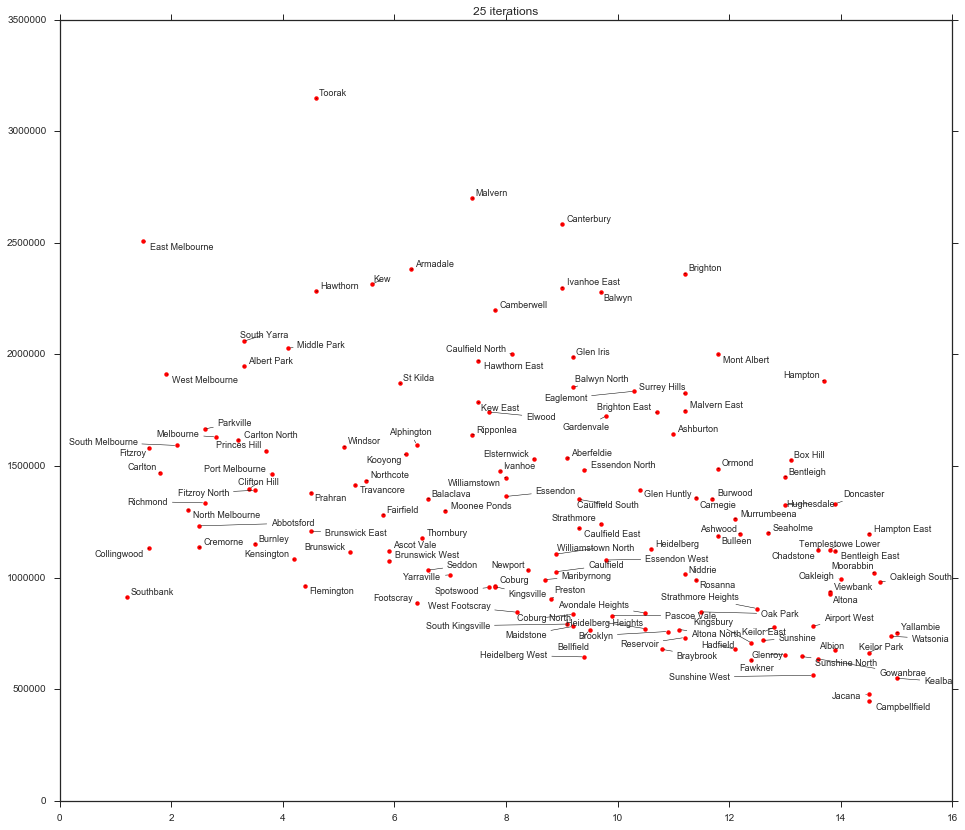

In [78]:
from adjustText import adjust_text

def plot_suburb_pd(adjust=True):
    plt.figure(figsize=(16, 14))
    plt.scatter(dp1['Distance'], dp1['Price'], s=20, c='r', edgecolors=(1,1,1,0))
    texts = []
    for x, y, s in zip(dp1['Distance'], dp1['Price'], dp1['Suburb']):
        texts.append(plt.text(x, y, s, size=9))
    if adjust:
        plt.title(str(adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5)))+' iterations')
_ = plot_suburb_pd()

In [79]:
dp = df1[['Suburb','Price','Distance', 'Type']]
dp2 = dp[dp["Type"] == "t"]
dp2 = dp2.groupby(['Suburb'], as_index=False)['Price', 'Distance'].mean()
print(dp2.head())

         Suburb         Price  Distance
0    Abbotsford  8.513333e+05       2.5
1    Aberfeldie  1.117500e+06       9.1
2  Airport West  6.116923e+05      13.5
3   Albert Park  1.550000e+06       3.3
4        Albion  3.095000e+05      13.9


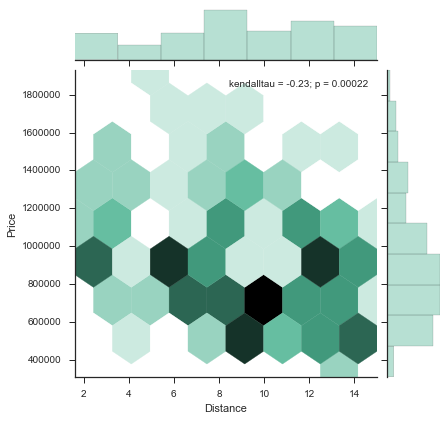

In [83]:
sns.jointplot(dp2["Distance"], dp2["Price"], kind="hex", stat_func=kendalltau, color="#4CB391")

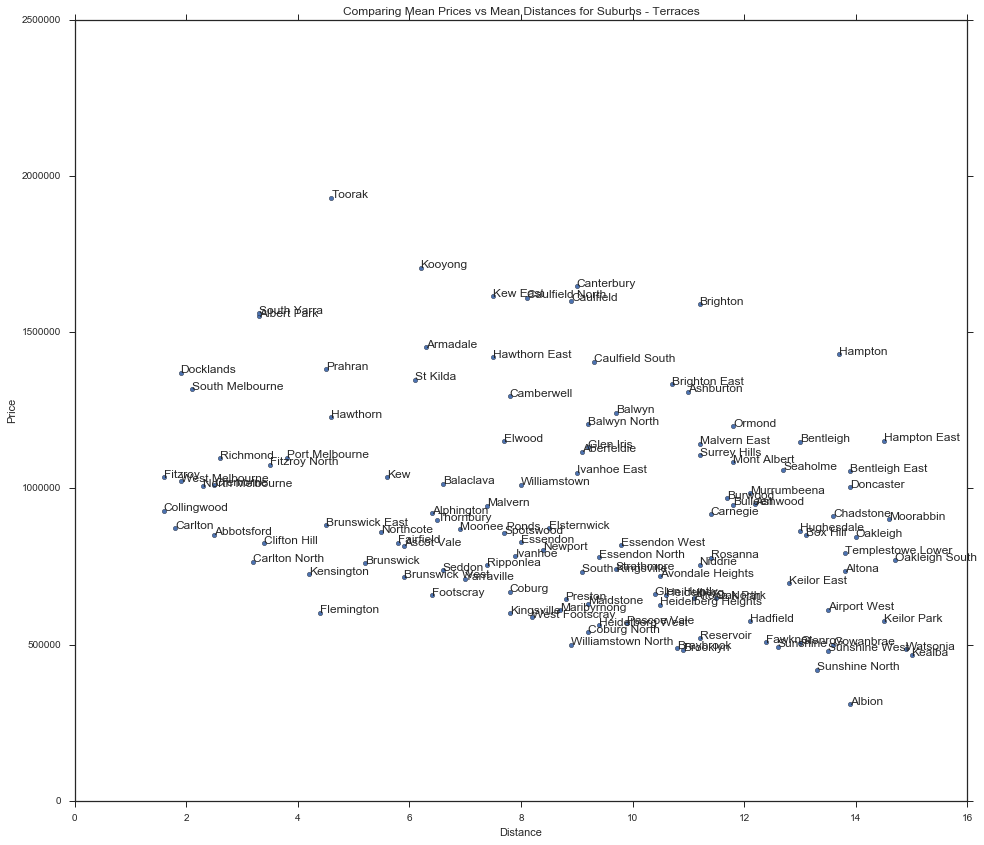

In [81]:
ax = dp2.plot(kind='scatter', 
              title="Comparing Mean Prices vs Mean Distances for Suburbs - Terraces", 
              x='Distance', 
              y='Price', 
              figsize=(16, 14))

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

label_point(dp2["Distance"], dp2["Price"], dp2["Suburb"], ax)

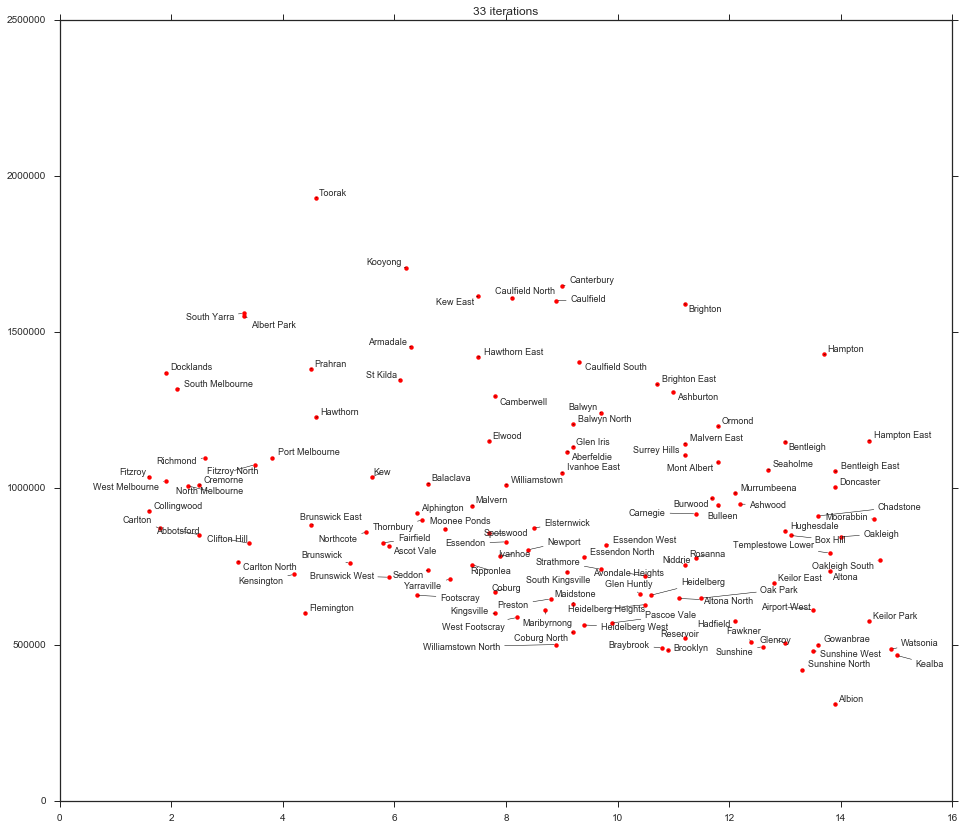

In [82]:
from adjustText import adjust_text

def plot_suburb_pd(adjust=True):
    plt.figure(figsize=(16, 14))
    plt.scatter(dp2['Distance'], dp2['Price'], s=20, c='r', edgecolors=(1,1,1,0))
    texts = []
    for x, y, s in zip(dp2['Distance'], dp2['Price'], dp2['Suburb']):
        texts.append(plt.text(x, y, s, size=9))
    if adjust:
        plt.title(str(adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5)))+' iterations')
_ = plot_suburb_pd()

In [84]:
dp = df1[['Suburb','Price','Distance', 'Type']]
dp3 = dp[dp["Type"] == "u"]
dp3 = dp3.groupby(['Suburb'], as_index=False)['Price', 'Distance'].mean()
print(dp3.head())

         Suburb          Price  Distance
0    Abbotsford  546700.000000       2.5
1    Aberfeldie  628000.000000       9.1
2  Airport West  563966.666667      13.5
3   Albert Park  966500.000000       3.3
4        Albion  308600.000000      13.9


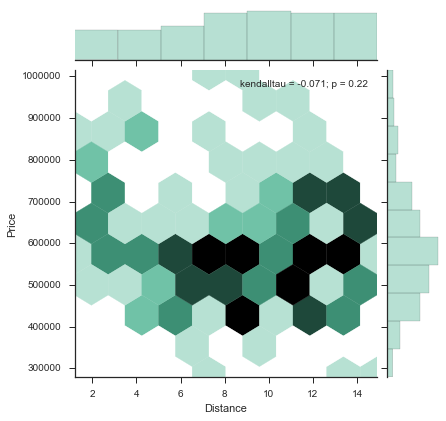

In [85]:
sns.jointplot(dp3["Distance"], dp3["Price"], kind="hex", stat_func=kendalltau, color="#4CB391")

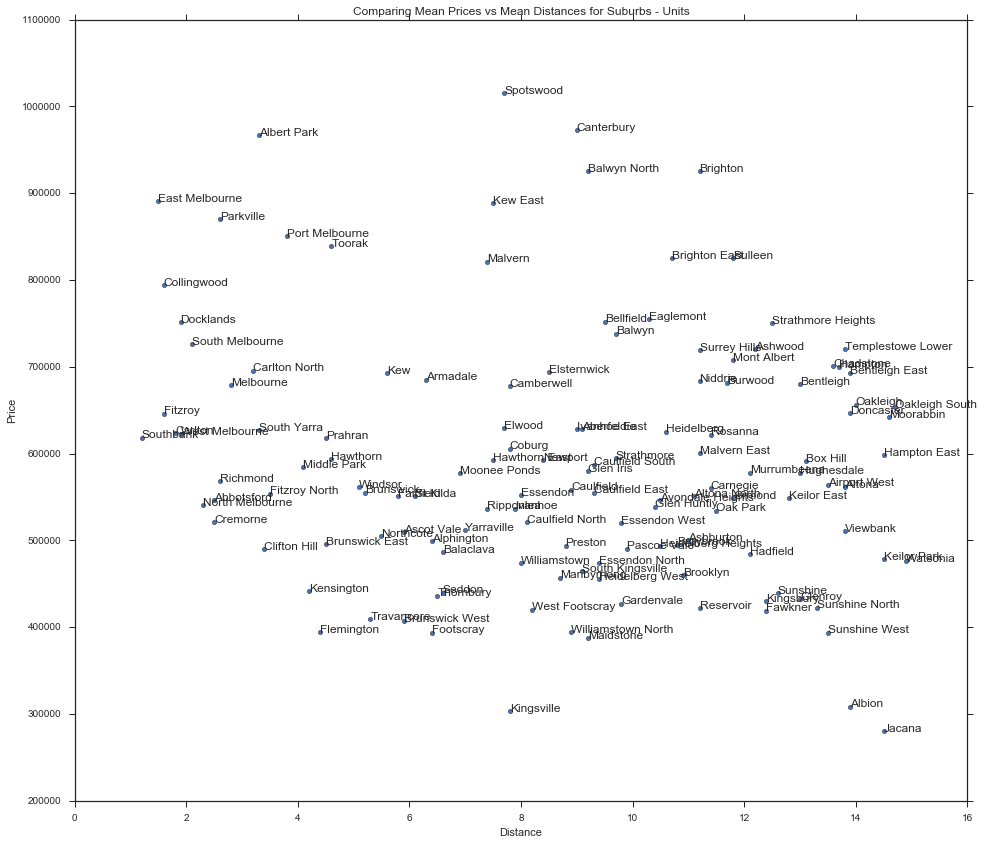

In [87]:
ax = dp3.plot(kind='scatter', 
              title="Comparing Mean Prices vs Mean Distances for Suburbs - Units", 
              x='Distance', 
              y='Price', 
              figsize=(16, 14))

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

label_point(dp3["Distance"], dp3["Price"], dp3["Suburb"], ax)

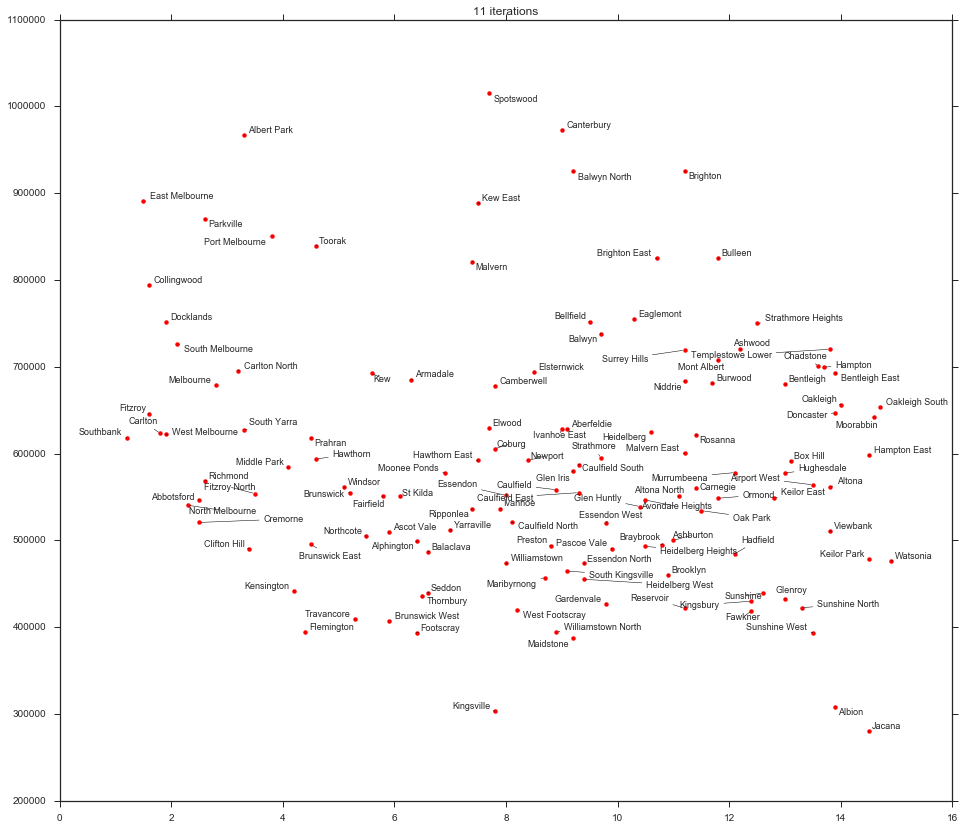

In [88]:
from adjustText import adjust_text

def plot_suburb_pd(adjust=True):
    plt.figure(figsize=(16, 14))
    plt.scatter(dp3['Distance'], dp3['Price'], s=20, c='r', edgecolors=(1,1,1,0))
    texts = []
    for x, y, s in zip(dp3['Distance'], dp3['Price'], dp3['Suburb']):
        texts.append(plt.text(x, y, s, size=9))
    if adjust:
        plt.title(str(adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5)))+' iterations')
_ = plot_suburb_pd()